<a href="https://colab.research.google.com/github/raghavadevarajeurs/MachineLearning/blob/main/Assignment1/Machine_Learning_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment1 by Raghava Urs (015135653)



In [1]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from io import BytesIO

Various Data Set used below are extracted from [Macro Trends](https://www.macrotrends.net/countries/USA/)


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#path = '/content/drive/My Drive/CMPE 257/Data/gdp_new.csv'
#gdp_df = pd.read_csv(path)
#gdp_df.head(5)

In [4]:
#path = '/content/drive/My Drive/CMPE 257/Data/united-states-carbon-co2-emissions.csv'
#co2_df = pd.read_csv(path)
#co2_df.head(5)

##GDP Data

In [5]:
#url="https://raw.githubusercontent.com/raghavadevarajeurs/MachineLearning/main/Data/united-states-gdp_new.csv"
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vRufhPBpjTiWgoLvxg7R2M_tjdS5yhisvr3Tssjx27OYOk370oxDh3HqQBbQAFPTuIi5KNAgrC59fka/pub?gid=532130325&single=true&output=csv"
file=requests.get(url).content
gdp_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [6]:
#file = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vRufhPBpjTiWgoLvxg7R2M_tjdS5yhisvr3Tssjx27OYOk370oxDh3HqQBbQAFPTuIi5KNAgrC59fka/pub?gid=532130325&single=true&output=csv')
#data = file.content
#df= pd.read_csv(BytesIO(data))

In [7]:
gdp_data.rename(columns={'GDP':'gdp'}, inplace=True)

In [8]:
gdp_data.head(5)

,date,gdp,percapita
0,1947-12-31,998.462,1719.223702
1,1948-12-31,1097.871,1881.308846
2,1949-12-31,1089.901,1824.273628
3,1950-12-31,1199.309,1973.347351
4,1951-12-31,1387.653,2254.245934


##GDP Growth Rate Data

In [9]:
#url="https://raw.githubusercontent.com/raghavadevarajeurs/MachineLearning/main/Data/united-states-gdp-growth-rate.csv"
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vRBTEZBJpTaTck7Ta3bmAQ9mvjZduHSrurPrpntADZqG4QRNGPDN4m7KcE_lylUd-I6eZdMhGd9gY14/pub?gid=1068844866&single=true&output=csv"
file=requests.get(url).content
gdp_growth_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [10]:
gdp_growth_data.describe()

,GDP_Growth_Percent,Growth_Annual_Change
count,59.000000,59.000000
mean,3.034549,-0.002373
std,2.047946,2.377443
min,-2.536800,-6.190000
25%,2.023600,-1.305000
50%,3.100000,0.030000
75%,4.423600,0.925000
max,7.236600,6.390000


##Fossil Fuel Consumption Data

In [11]:
#url="https://raw.githubusercontent.com/raghavadevarajeurs/MachineLearning/main/Data/united-states-fossil-fuel-consumption.csv"
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQokgxCFnq9qPpnNtACj8YdugZQZyzY1c5wAxKjEnQ9LvfmS2d50r2oUKDVg7ROIUbA6ymQ47RqsMjx/pub?gid=1796695615&single=true&output=csv"
file=requests.get(url).content
fossil_fuel_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [12]:
fossil_fuel_data.describe()

,Energy_Fossil_Use_Percent,Fossil_Enr_Annual_Change
count,56.000000,56.000000
mean,89.289663,-0.233929
std,4.551425,0.375842
min,82.427800,-1.060000
25%,85.762125,-0.557500
50%,87.235550,-0.245000
75%,94.361675,0.030000
max,95.982200,0.950000


##Coal Usage Consumption Data

In [13]:
#url="https://raw.githubusercontent.com/raghavadevarajeurs/MachineLearning/main/Data/united-states-coal-usage-consumption.csv"
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vTLls1crIJ5V3OD--E1vI_rxUSd5ufVrS3aldwyX-c0tD0Qpjv23z_-o40M_wtx65BsJcEW9_xZskl-/pub?gid=1788829577&single=true&output=csv"
file=requests.get(url).content
coal_usage_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [14]:
coal_usage_data.describe()

,Elect_frm_Coal_Percent,Elect_Annual_Change
count,56.000000,56.000000
mean,50.139952,-0.351607
std,5.086803,1.755471
min,34.232700,-5.420000
25%,46.169200,-1.050000
50%,51.846300,-0.255000
75%,53.692325,0.797500
max,57.679300,3.660000


##CO2 Emission Data

In [15]:
#url="https://raw.githubusercontent.com/raghavadevarajeurs/MachineLearning/main/Data/united-states-carbon-co2-emissions.csv"
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vRkgrMOas1FoX60POYWmBzmbVBH4XpGwSwN3qGMxcwwyuUvNTCjVTmOieRGDCDsFg-gBkPDw8IdaWmv/pub?gid=1330943709&single=true&output=csv"
file=requests.get(url).content
co2_emissions_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [16]:
co2_emissions_data.describe()

,KT_CO2,Metric_TON_PerCapita
count,5.700000e+01,57.000000
mean,4.734172e+06,19.012072
std,7.755318e+05,1.756330
min,2.880506e+06,15.502200
25%,4.406330e+06,18.121100
50%,4.890861e+06,19.322800
75%,5.263505e+06,19.857900
max,5.789727e+06,22.510600


##Greenhouse Gase Emission Data


In [17]:
#url="https://raw.githubusercontent.com/raghavadevarajeurs/MachineLearning/main/Data/united-states-ghg-greenhouse-gas-emissions.csv"
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQ65Pq2atZLXAMm2ngUMThbkwWYPSQiXyKu2wJ38A-As4r_O7d1gFw10YtHMNCj6mikxwKJKXeFuS2J/pub?gid=370728380&single=true&output=csv"
file=requests.get(url).content
greenhouse_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [18]:
greenhouse_data.describe()

,KT_CO2,CO2_Annual_Change
count,4.300000e+01,43.000000
mean,6.267232e+06,0.416047
std,5.300390e+05,2.897572
min,5.400504e+06,-6.730000
25%,5.803574e+06,-1.070000
50%,6.185748e+06,0.270000
75%,6.718882e+06,2.290000
max,7.244272e+06,7.700000


##Poverty Rate Data

In [19]:
#url="https://raw.githubusercontent.com/raghavadevarajeurs/MachineLearning/main/Data/united-states-poverty-rate.csv"
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQ2zLO5wUpdG2zth16AIj4s59bWHYvTEYYg9HBTHjAJskx9VH-TU0iEDdVnkqGTPQOJ4IAa0-xm7Sz7/pub?gid=298180339&single=true&output=csv"
file=requests.get(url).content
poverty_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [20]:
poverty_data.describe()

,percentage_below_poverty,poverty_percent_Change
count,12.000000,12.000000
mean,1.458333,0.000000
std,0.239159,0.262851
min,1.200000,-0.500000
25%,1.200000,-0.050000
50%,1.500000,0.000000
75%,1.700000,0.050000
max,1.700000,0.500000


##Unemployment Rate Data

In [21]:
#url="https://raw.githubusercontent.com/raghavadevarajeurs/MachineLearning/main/Data/united-states-unemployment-rate.csv"
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vSinZ72igDe1Lvy_WNJZ7viAMJfqVPuw_ROh1BmCCSweFTkAnFkYiMTYrC_wwu_l9VMboWLy5fookM7/pub?gid=290874763&single=true&output=csv"
file=requests.get(url).content
unemployment_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [22]:
unemployment_data.describe()

,Unemployment_Rate,Unemployment_Annual_Change
count,29.000000,29.000000
mean,5.855690,-0.107241
std,1.620264,0.895807
min,3.682000,-1.210000
25%,4.623000,-0.510000
50%,5.529000,-0.450000
75%,6.800000,0.000000
max,9.633000,3.470000


##Population Data

In [23]:
#url="https://raw.githubusercontent.com/raghavadevarajeurs/MachineLearning/main/Data/united-states-population.csv"
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vRVIiFoLUpum18-t3bEWs8obGghGdgLIpHFOVdKvmci1--UgPcXeE9utwuaUsSfjd_GLiaNnSymevZD/pub?gid=732277408&single=true&output=csv"
file=requests.get(url).content
population_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [24]:
population_data.describe()

,Population,Population_Annual_Change
count,7.100000e+01,71.000000
mean,2.446810e+08,1.040563
std,5.056870e+07,0.322786
min,1.588044e+08,0.000000
25%,2.048554e+08,0.900000
50%,2.404998e+08,0.940000
75%,2.885474e+08,1.190000
max,3.310027e+08,1.760000


##Data Aggregation

All the available data is having date parameter, using this as the primary key we have integrated the data sets.

In [25]:
dateRange = pd.date_range(start='1945-01-01', end='2020-12-31')
df = pd.DataFrame({ 'date': dateRange})
df['date'] = df['date'].astype(str)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27759 entries, 0 to 27758
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    27759 non-null  object
dtypes: object(1)
memory usage: 217.0+ KB


,date
0,1945-01-01
1,1945-01-02
2,1945-01-03
3,1945-01-04
4,1945-01-05


In [26]:
def combine_data(initFrame, data):
  return initFrame.merge(data ,how='outer',left_on='date', right_on='date')

In [27]:
for data in [gdp_data,gdp_growth_data,co2_emissions_data,coal_usage_data,fossil_fuel_data,greenhouse_data,population_data, poverty_data,unemployment_data]:
  df = combine_data(df, data)

df.head()

,date,gdp,percapita,GDP_Growth_Percent,Growth_Annual_Change,KT_CO2_x,Metric_TON_PerCapita,Elect_frm_Coal_Percent,Elect_Annual_Change,Energy_Fossil_Use_Percent,Fossil_Enr_Annual_Change,KT_CO2_y,CO2_Annual_Change,Population,Population_Annual_Change,percentage_below_poverty,poverty_percent_Change,Unemployment_Rate,Unemployment_Annual_Change
0,1945-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1945-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1945-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1945-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1945-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Data Cleaning

In [28]:
df.columns

Index(['date', 'gdp', 'percapita', 'GDP_Growth_Percent',
       'Growth_Annual_Change', 'KT_CO2_x', 'Metric_TON_PerCapita',
       'Elect_frm_Coal_Percent', 'Elect_Annual_Change',
       'Energy_Fossil_Use_Percent', 'Fossil_Enr_Annual_Change', 'KT_CO2_y',
       'CO2_Annual_Change', 'Population', 'Population_Annual_Change',
       'percentage_below_poverty', 'poverty_percent_Change',
       'Unemployment_Rate', 'Unemployment_Annual_Change'],
      dtype='object')

In [29]:
column_names = ['gdp', 'percapita', 'GDP_Growth_Percent',
       'Growth_Annual_Change', 'KT_CO2_x', 'Metric_TON_PerCapita',
       'Elect_frm_Coal_Percent', 'Elect_Annual_Change',
       'Energy_Fossil_Use_Percent', 'Fossil_Enr_Annual_Change', 'KT_CO2_y',
       'CO2_Annual_Change', 'Population', 'Population_Annual_Change',
       'percentage_below_poverty', 'poverty_percent_Change',
       'Unemployment_Rate', 'Unemployment_Annual_Change']
df = df.dropna(subset=column_names, how='all')
df.head(200)

,date,gdp,percapita,GDP_Growth_Percent,Growth_Annual_Change,KT_CO2_x,Metric_TON_PerCapita,Elect_frm_Coal_Percent,Elect_Annual_Change,Energy_Fossil_Use_Percent,Fossil_Enr_Annual_Change,KT_CO2_y,CO2_Annual_Change,Population,Population_Annual_Change,percentage_below_poverty,poverty_percent_Change,Unemployment_Rate,Unemployment_Annual_Change
1094,1947-12-31,998.462,1719.223702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,1948-12-31,1097.871,1881.308846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1825,1949-12-31,1089.901,1824.273628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2190,1950-12-31,1199.309,1973.347351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158804395.0,0.00,NaN,NaN,NaN,NaN
2555,1951-12-31,1387.653,2254.245934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160872266.0,1.30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26297,2016-12-31,74828.755,57902.926170,1.6378,-1.27,5006302.077,15.5022,NaN,NaN,NaN,NaN,NaN,NaN,323015995.0,0.67,1.7,0.0,4.869,-0.41
26662,2017-12-31,77941.576,59847.241630,2.3698,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325084756.0,0.64,NaN,NaN,4.355,-0.51
27027,2018-12-31,82002.542,62718.009410,2.9273,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327096265.0,0.62,NaN,NaN,3.896,-0.46
27392,2019-12-31,NaN,NaN,2.1612,-0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329064917.0,0.60,NaN,NaN,3.682,-0.21


In [30]:
def fill_na(initialFrame, cols):
  return initialFrame[cols].fillna(initialFrame[cols].mean())

In [31]:
for cols in column_names:
  df[cols] = fill_na(df, cols)

df.head(200)

,date,gdp,percapita,GDP_Growth_Percent,Growth_Annual_Change,KT_CO2_x,Metric_TON_PerCapita,Elect_frm_Coal_Percent,Elect_Annual_Change,Energy_Fossil_Use_Percent,Fossil_Enr_Annual_Change,KT_CO2_y,CO2_Annual_Change,Population,Population_Annual_Change,percentage_below_poverty,poverty_percent_Change,Unemployment_Rate,Unemployment_Annual_Change
1094,1947-12-31,998.462000,1719.223702,3.034549,-0.002373,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,2.446810e+08,1.040563,1.458333,0.0,5.85569,-0.107241
1460,1948-12-31,1097.871000,1881.308846,3.034549,-0.002373,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,2.446810e+08,1.040563,1.458333,0.0,5.85569,-0.107241
1825,1949-12-31,1089.901000,1824.273628,3.034549,-0.002373,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,2.446810e+08,1.040563,1.458333,0.0,5.85569,-0.107241
2190,1950-12-31,1199.309000,1973.347351,3.034549,-0.002373,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,1.588044e+08,0.000000,1.458333,0.0,5.85569,-0.107241
2555,1951-12-31,1387.653000,2254.245934,3.034549,-0.002373,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,1.608723e+08,1.300000,1.458333,0.0,5.85569,-0.107241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26297,2016-12-31,74828.755000,57902.926170,1.637800,-1.270000,5.006302e+06,15.502200,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,3.230160e+08,0.670000,1.700000,0.0,4.86900,-0.410000
26662,2017-12-31,77941.576000,59847.241630,2.369800,0.730000,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,3.250848e+08,0.640000,1.458333,0.0,4.35500,-0.510000
27027,2018-12-31,82002.542000,62718.009410,2.927300,0.560000,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,3.270963e+08,0.620000,1.458333,0.0,3.89600,-0.460000
27392,2019-12-31,23934.144486,21232.686715,2.161200,-0.770000,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,3.290649e+08,0.600000,1.458333,0.0,3.68200,-0.210000


##Data Exploration

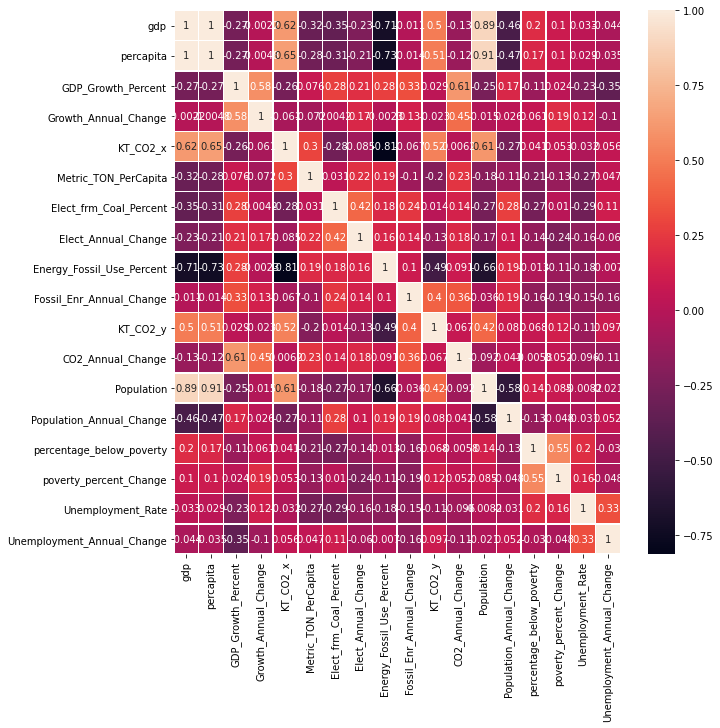

In [32]:
correlation = df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

Following points can be infered from the above correlation matrix. 

1.   Co2 emision is negatively correlated to GDP Growth Rate.
2.   Population Annual Change is negatively correlated with Co2 emission.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 1094 to 27758
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        74 non-null     object 
 1   gdp                         74 non-null     float64
 2   percapita                   74 non-null     float64
 3   GDP_Growth_Percent          74 non-null     float64
 4   Growth_Annual_Change        74 non-null     float64
 5   KT_CO2_x                    74 non-null     float64
 6   Metric_TON_PerCapita        74 non-null     float64
 7   Elect_frm_Coal_Percent      74 non-null     float64
 8   Elect_Annual_Change         74 non-null     float64
 9   Energy_Fossil_Use_Percent   74 non-null     float64
 10  Fossil_Enr_Annual_Change    74 non-null     float64
 11  KT_CO2_y                    74 non-null     float64
 12  CO2_Annual_Change           74 non-null     float64
 13  Population                  74 

In [34]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [35]:
df.head()

,date,gdp,percapita,GDP_Growth_Percent,Growth_Annual_Change,KT_CO2_x,Metric_TON_PerCapita,Elect_frm_Coal_Percent,Elect_Annual_Change,Energy_Fossil_Use_Percent,Fossil_Enr_Annual_Change,KT_CO2_y,CO2_Annual_Change,Population,Population_Annual_Change,percentage_below_poverty,poverty_percent_Change,Unemployment_Rate,Unemployment_Annual_Change,year
1094,1947-12-31,998.462,1719.223702,3.034549,-0.002373,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,2.446810e+08,1.040563,1.458333,0.0,5.85569,-0.107241,1947
1460,1948-12-31,1097.871,1881.308846,3.034549,-0.002373,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,2.446810e+08,1.040563,1.458333,0.0,5.85569,-0.107241,1948
1825,1949-12-31,1089.901,1824.273628,3.034549,-0.002373,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,2.446810e+08,1.040563,1.458333,0.0,5.85569,-0.107241,1949
2190,1950-12-31,1199.309,1973.347351,3.034549,-0.002373,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,1.588044e+08,0.000000,1.458333,0.0,5.85569,-0.107241,1950
2555,1951-12-31,1387.653,2254.245934,3.034549,-0.002373,4.734172e+06,19.012072,50.139952,-0.351607,89.289663,-0.233929,6.267232e+06,0.416047,1.608723e+08,1.300000,1.458333,0.0,5.85569,-0.107241,1951


In [36]:
del df['date']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 1094 to 27758
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gdp                         74 non-null     float64
 1   percapita                   74 non-null     float64
 2   GDP_Growth_Percent          74 non-null     float64
 3   Growth_Annual_Change        74 non-null     float64
 4   KT_CO2_x                    74 non-null     float64
 5   Metric_TON_PerCapita        74 non-null     float64
 6   Elect_frm_Coal_Percent      74 non-null     float64
 7   Elect_Annual_Change         74 non-null     float64
 8   Energy_Fossil_Use_Percent   74 non-null     float64
 9   Fossil_Enr_Annual_Change    74 non-null     float64
 10  KT_CO2_y                    74 non-null     float64
 11  CO2_Annual_Change           74 non-null     float64
 12  Population                  74 non-null     float64
 13  Population_Annual_Change    74 

##Gausian Mixture Model 

In [38]:
from sklearn.mixture import GaussianMixture

In [39]:
gmix = GaussianMixture (n_components=2, covariance_type="full").fit(df)
clabel = gmix.predict(df)

No handles with labels found to put in legend.


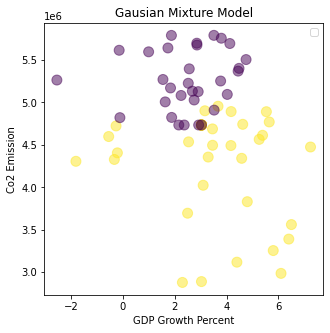

In [40]:
plt.figure(figsize=(5,5))
plt.scatter(df.values[:, 2], df.values[:, 4], c=clabel, s=100, alpha=0.5)
plt.title('Gausian Mixture Model')
plt.xlabel('GDP Growth Percent')
plt.ylabel('Co2 Emission')
plt.legend()
plt.show()

No handles with labels found to put in legend.


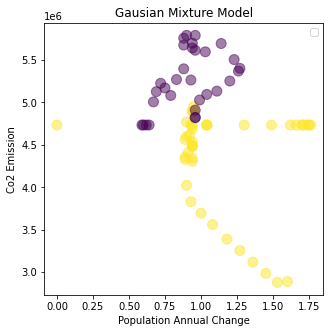

In [41]:
plt.figure(figsize=(5,5))
plt.scatter(df.values[:, 13], df.values[:, 4], c=clabel, s=100, alpha=0.5)
plt.title('Gausian Mixture Model')
plt.xlabel('Population Annual Change')
plt.ylabel('Co2 Emission')
plt.legend()
plt.show()

##Agglomerative

In [42]:
from sklearn.cluster import AgglomerativeClustering 

In [43]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average' ) 
agglabel=cluster.fit_predict(df)

No handles with labels found to put in legend.


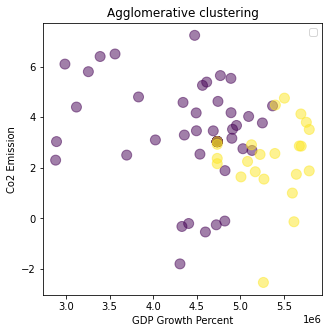

In [44]:

plt.figure(figsize=(5,5))
plt.scatter(df.values[:, 4], df.values[:, 2], c=agglabel, s=100, alpha=0.5)
plt.title('Agglomerative clustering')
plt.xlabel('GDP Growth Percent')
plt.ylabel('Co2 Emission')
plt.legend()
plt.show()

No handles with labels found to put in legend.


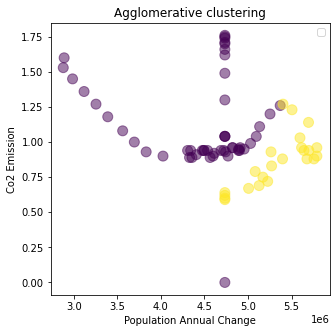

In [45]:
plt.figure(figsize=(5,5))
plt.scatter(df.values[:, 4], df.values[:, 13], c=agglabel, s=100, alpha=0.5)
plt.title('Agglomerative clustering')
plt.xlabel('Population Annual Change')
plt.ylabel('Co2 Emission')
plt.legend()
plt.show()

##Kmeans using Scikit Learn

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 1094 to 27758
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gdp                         74 non-null     float64
 1   percapita                   74 non-null     float64
 2   GDP_Growth_Percent          74 non-null     float64
 3   Growth_Annual_Change        74 non-null     float64
 4   KT_CO2_x                    74 non-null     float64
 5   Metric_TON_PerCapita        74 non-null     float64
 6   Elect_frm_Coal_Percent      74 non-null     float64
 7   Elect_Annual_Change         74 non-null     float64
 8   Energy_Fossil_Use_Percent   74 non-null     float64
 9   Fossil_Enr_Annual_Change    74 non-null     float64
 10  KT_CO2_y                    74 non-null     float64
 11  CO2_Annual_Change           74 non-null     float64
 12  Population                  74 non-null     float64
 13  Population_Annual_Change    74 

In [47]:
from sklearn.cluster import KMeans
kmeans_df = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
y_kmeans_df = kmeans_df.fit_predict(df)

No handles with labels found to put in legend.


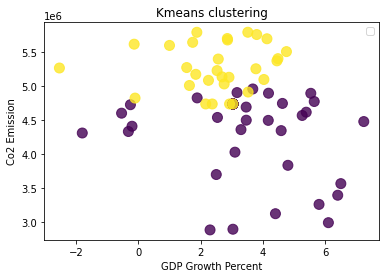

In [48]:
plt.scatter(df.values[:, 2], df.values[:, 4], c=y_kmeans_df, s=100, alpha=0.8)
plt.title('Kmeans clustering')
plt.xlabel('GDP Growth Percent')
plt.ylabel('Co2 Emission')
plt.legend()
plt.show()

No handles with labels found to put in legend.


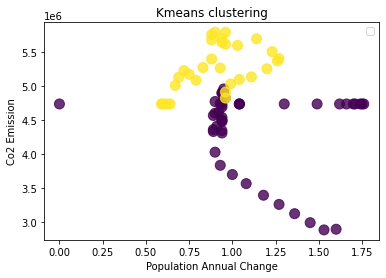

In [49]:
plt.scatter(df.values[:, 13], df.values[:, 4], c=y_kmeans_df, s=100, alpha=0.8)
plt.title('Kmeans clustering')
plt.xlabel('Population Annual Change')
plt.ylabel('Co2 Emission')
plt.legend()
plt.show()

##TF implemantaion

In [50]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [51]:
dPts= df
mms = MinMaxScaler()
mms.fit(dPts)
data_transformed = mms.transform(dPts)
dPts_=dPts.to_numpy()

In [52]:
def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(dPts_, dtype=tf.float32), num_epochs=1)

In [53]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) 
 
num_clusters = 2

kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
    kmeans.train(input_fn)
    cluster_centers = kmeans.cluster_centers()
    if previous_centers is not None:
        print('delta:', cluster_centers - previous_centers)
    previous_centers = cluster_centers
    print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)

cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(dPts_):
    cluster_index = cluster_indices[i]
    center = cluster_centers[cluster_index]

score: 1.13907455e+17
delta: [[ 1.5022273e+04  9.7889609e+03 -1.9244802e+00 -5.2680485e-02
  -8.6815500e+04 -1.0541744e+00 -4.2803612e+00  2.9451746e-01
  -2.0930481e-01  1.9038360e-01 -1.2187400e+05 -1.8746771e-01
   2.4304544e+07 -3.6444455e-01  1.9752979e-02  1.8518517e-02
   1.2111359e+00  3.6713922e-01  8.9998779e+00]
 [ 7.2300713e+03  7.2696748e+03  2.7438211e-01  1.1666067e-02
  -3.3320450e+05  2.7979279e-01  9.6808624e-01  2.4350305e-01
   1.9602737e+00 -3.1200603e-02 -2.0675650e+05  1.3414639e-01
  -3.1480176e+07  7.7557445e-02 -1.1347771e-02 -1.0638298e-02
   7.7292442e-02  8.9728758e-03  2.3000000e+01]]
score: 5.07106e+16
delta: [[-1.6907461e+03 -1.1523320e+03  4.0046930e-02  1.0018487e-01
  -2.3799000e+04  4.9531937e-02  3.3558273e-01  8.1067741e-02
  -2.1286011e-03  2.6870102e-02 -2.8761500e+04  1.0534255e-01
  -2.8426560e+06  4.7893524e-03 -1.3624430e-03 -1.2771394e-03
   1.0199070e-01  1.1921443e-02 -1.0000000e+00]
 [-8.2352148e+02 -7.4881348e+02  7.6148510e-03 -6.314253

In [54]:
centers = kmeans.cluster_centers()
centers

array([[ 4.8751117e+04,  4.0824613e+04,  2.5067914e+00,  8.5875615e-03,
         5.2747440e+06,  1.8590614e+01,  4.8917339e+01, -6.8693435e-01,
         8.5869148e+01, -1.7232144e-01,  6.5808885e+06,  2.4427906e-01,
         2.9523392e+08,  9.1199988e-01,  1.4674999e+00,  1.6666666e-02,
         5.8556890e+00, -1.0724138e-01,  2.0054999e+03],
       [ 7.0134771e+03,  7.8745527e+03,  3.3943839e+00, -9.8459180e-03,
         4.3656005e+06,  1.9299429e+01,  5.0973534e+01, -1.2297483e-01,
         9.1621811e+01, -2.7593347e-01,  6.0533755e+06,  5.3316063e-01,
         2.1021310e+08,  1.1282200e+00,  1.4520830e+00, -1.1363637e-02,
         5.8556857e+00, -1.0724135e-01,  1.9685000e+03]], dtype=float32)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 1094 to 27758
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gdp                         74 non-null     float64
 1   percapita                   74 non-null     float64
 2   GDP_Growth_Percent          74 non-null     float64
 3   Growth_Annual_Change        74 non-null     float64
 4   KT_CO2_x                    74 non-null     float64
 5   Metric_TON_PerCapita        74 non-null     float64
 6   Elect_frm_Coal_Percent      74 non-null     float64
 7   Elect_Annual_Change         74 non-null     float64
 8   Energy_Fossil_Use_Percent   74 non-null     float64
 9   Fossil_Enr_Annual_Change    74 non-null     float64
 10  KT_CO2_y                    74 non-null     float64
 11  CO2_Annual_Change           74 non-null     float64
 12  Population                  74 non-null     float64
 13  Population_Annual_Change    74 

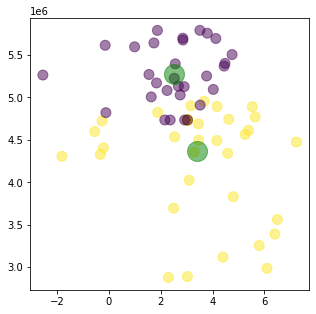

In [56]:
tensor_data=tf.convert_to_tensor(dPts_, dtype=tf.float32)
plt.subplots(figsize=(5, 5))

plt.scatter(tensor_data[:, 2], tensor_data[:, 4], c=cluster_indices, s=100, alpha=0.5,cmap='viridis')

plt.scatter(centers[:, 2], centers[:, 4], c='green', s=400, alpha=0.5);

#Conclusion
From the above algorithm implementation we were able verify that CO2 emission effects both GDP Growth rate and Population annual change. 